# Assignment 10 – Support Vector Machine

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [10]:
df = pd.read_csv('Pharma_Industry.csv')
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [11]:
print("Shape:", df.shape)
df.info()
df.describe(include="all").T

Shape: (500, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


,count,mean,std,min,25%,50%,75%,max
Drug Dosage (mg),500.0,-0.037761,0.979891,-3.019512,-0.642003,-0.019340,0.641151,2.949094
Systolic Blood Pressure (mmHg),500.0,0.214957,1.247567,-3.773897,-0.565168,0.201532,0.951375,4.111751
Heart Rate (BPM),500.0,0.062871,0.971978,-2.940389,-0.648157,0.027732,0.710774,3.193108
Liver Toxicity Index (U/L),500.0,0.054398,0.986001,-3.401277,-0.586085,-0.065661,0.633914,3.373269
Blood Glucose Level (mg/dL),500.0,-0.171863,0.983765,-3.110431,-0.797715,-0.108106,0.513555,2.518023
Drug Response,500.0,0.520000,0.500100,0.000000,0.000000,1.000000,1.000000,1.000000


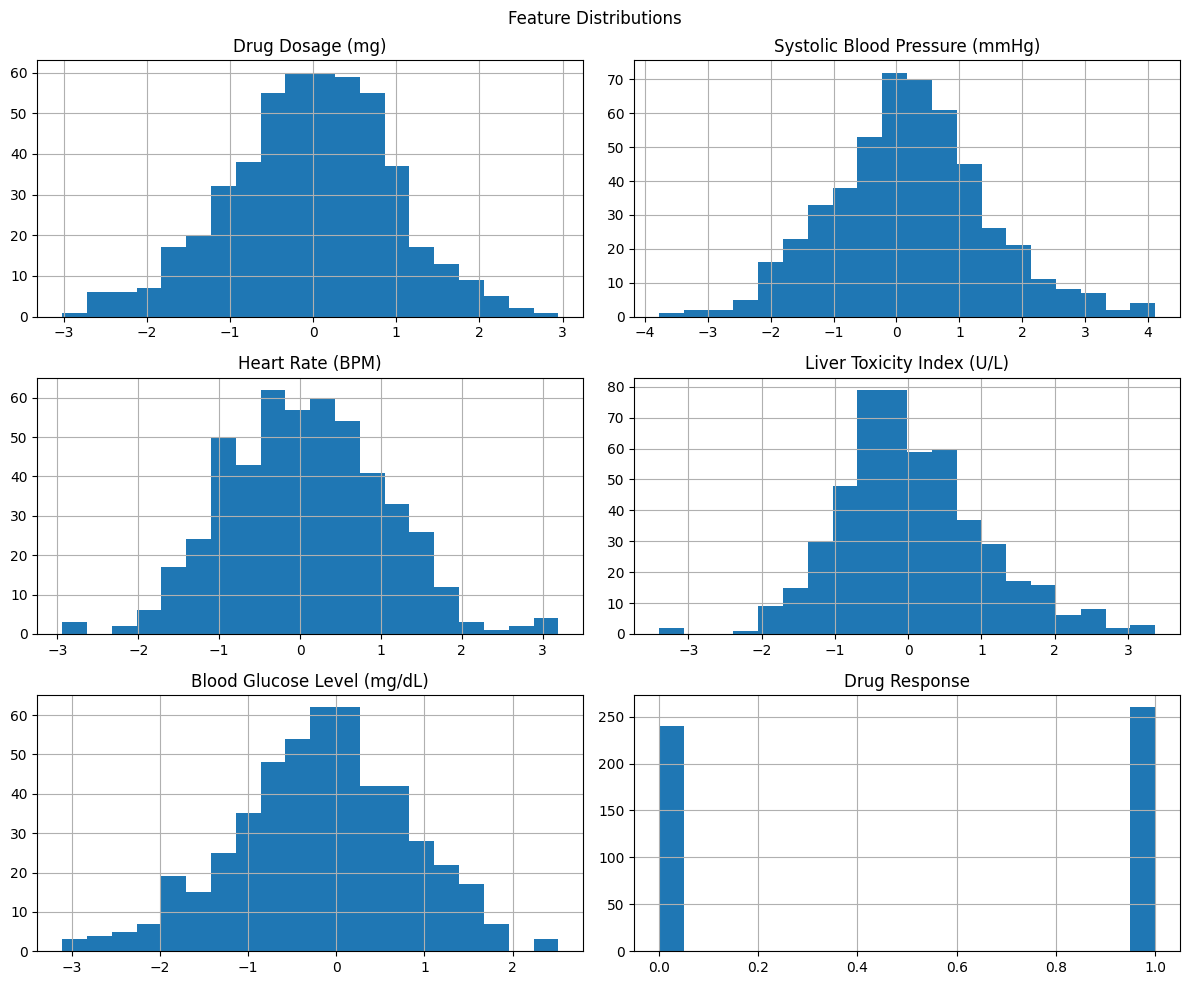

<Figure size 1200x600 with 0 Axes>

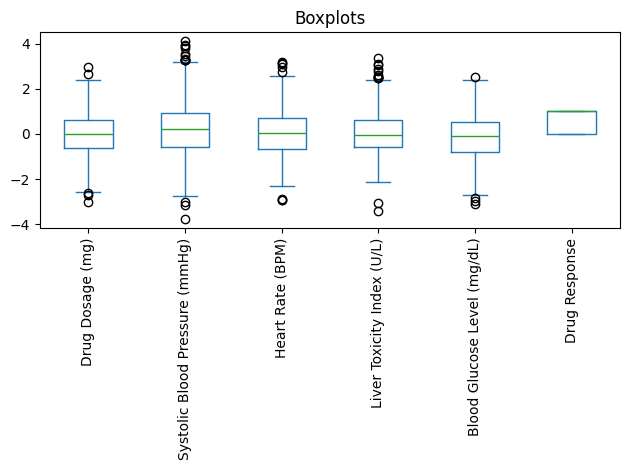

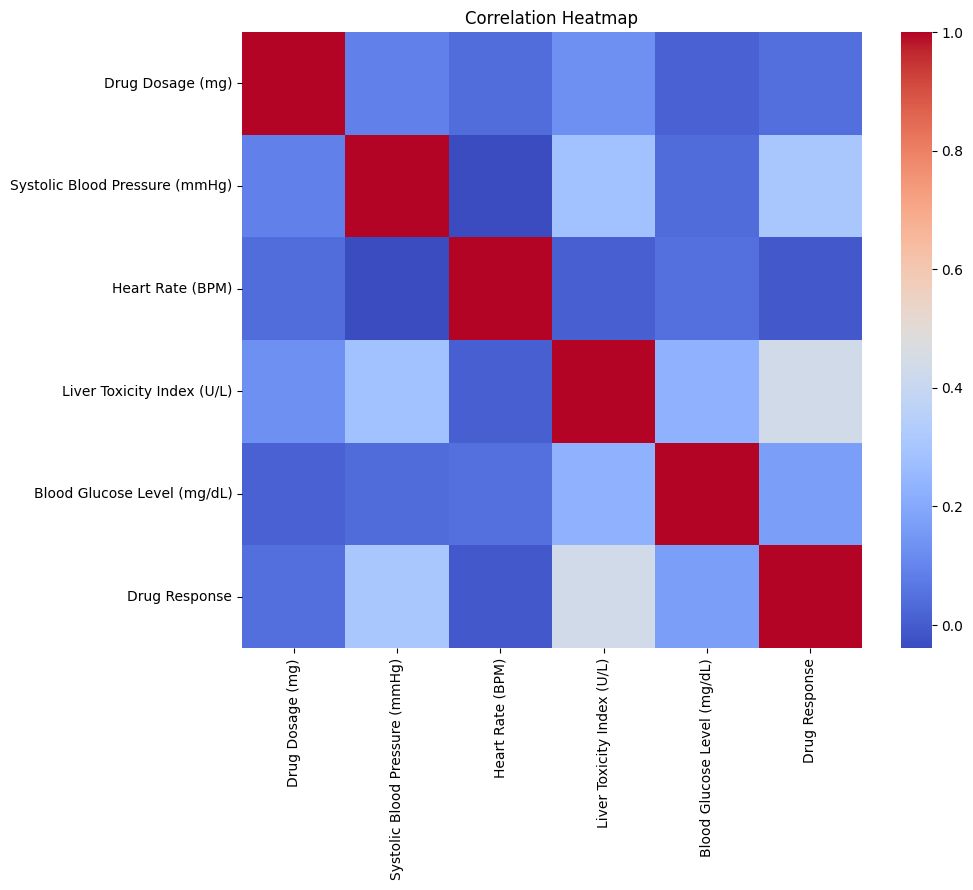

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
df[numeric_cols].plot(kind="box", rot=90)
plt.title("Boxplots")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [13]:
target_col = 'Drug Response'
X = df.drop(columns=[target_col])
y = df[target_col]

for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Visualization

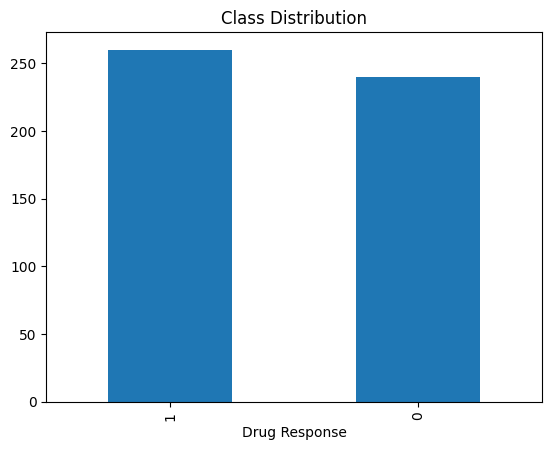

In [14]:
y.value_counts().plot(kind="bar", title="Class Distribution")
plt.show()

## SVM Implementation

In [15]:
svm = SVC(kernel="rbf")
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy : 0.77
Precision: 0.7543859649122807
Recall   : 0.8269230769230769
F1-score : 0.7889908256880734
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



## Visualization of Results

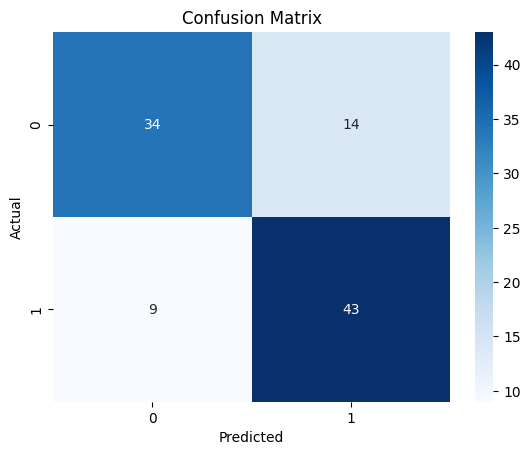

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Hyperparameter Tuning

In [17]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="f1")
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best F1:", grid.best_score_)

Best Params: {'C': 10, 'kernel': 'rbf'}
Best F1: 0.7583838973876638


## Kernel Comparison

In [18]:
results = {}
for k in ["linear","poly","rbf"]:
    m = SVC(kernel=k)
    m.fit(X_train_scaled, y_train)
    preds = m.predict(X_test_scaled)
    results[k] = f1_score(y_test, preds)

pd.DataFrame.from_dict(results, orient="index", columns=["F1-score"])

,F1-score
linear,0.714286
poly,0.660194
rbf,0.788991


### SVM – Analysis

**Strengths**
- Works well in high-dimensional spaces
- Effective with clear margins

**Weaknesses**
- Sensitive to kernel and hyperparameters
- Slower on large datasets

**Practical Use**
- Drug response prediction
- Personalized medicine
